week5

다음 사이트에서 insurance.csv 데이터를 다운 받아 주세요.

https://www.kaggle.com/datasets/mirichoi0218/insurance/code 

###1. Medical Cost Perconal Datasets을 이용한 선형 회귀 문제

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

1.1 'insurance.csv' 데이터셋을 로드하여 insurance 변수에 저장하고, head()를 통해 데이터를 확인하세요.

In [164]:
insurance = pd.read_csv('/Users/dohakim/Python_Workplace/Euron/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1.2 데이터의 정보를 확인하세요.

In [165]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1.3 데이터의 기본 통계량을 확인하세요.

In [166]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1.4  'sex', 'smoker', 'region' 세 카테고리 변수는 인코딩이 필요합니다. 'get_dummies'를 이용하여 원핫 인코딩을 진행하세요.

In [167]:
insurance = pd.get_dummies(insurance, columns = ['sex', 'smoker', 'region'])
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


1.5 독립변수(X), 종속변수(y = 'charges')을 분리한 후 'train_test_split'으로 학습 데이터와 테스트 데이터를 분리해주세요. (test_size = 0.3, random_state=0) 

In [168]:
from sklearn.model_selection import train_test_split
X = insurance.drop('charges', axis = 1)
y = insurance.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

1.6 사이킷런 LinearRegression 클래스를 통해 회귀 모델 학습/예측을 수행해주세요.

In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

1.7 사이킷런 API를 이용해 MAE, MSE, RMSE, R2 평가지표로 평가를 수행하고 출력하세요.


In [171]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [172]:
mae = mean_absolute_error(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_preds)

print('MAE : {0:.3f} / MSE : {1:.3f} / RMSE : {2:.3f} / R2 : {3:.3f}'.format(mae,mse,rmse,r2))

MAE : 4011.450 / MSE : 33342497.827 / RMSE : 5774.296 / R2 : 0.791


1.8 LinearRegression의 속성을 이용해 절편과 회귀계수를 출력해주세요.

In [173]:
print('절편 값 :', lr.intercept_)
print('회귀 계수 값:', lr.coef_)

절편 값 : -730.112166270248
회귀 계수 값: [   256.43544682    335.36907276    472.70978916     23.77337759
    -23.77337759 -11717.99558474  11717.99558474    589.02469054
     27.12354518   -405.723989     -210.42424672]


1.9 coef_ 속성은 회귀계수만을 보여주기 때문에, 어떤 칼럼에 대한 회귀 계수인지 알 수 없습니다. 피처별 회귀계수 값을 매핑하여 높은 순으로 출력하세요.

In [174]:
coef = pd.Series(data = np.round(lr.coef_, 1), index = X.columns)
coef.sort_values(ascending = False)

smoker_yes          11718.0
region_northeast      589.0
children              472.7
bmi                   335.4
age                   256.4
region_northwest       27.1
sex_female             23.8
sex_male              -23.8
region_southwest     -210.4
region_southeast     -405.7
smoker_no          -11718.0
dtype: float64

1.10 이번에는 교차검증을 통해 MAE, MSE를 계산해보겠습니다. 'neg'에 주의하여 'cross_val_score'을 실시하고 [개별 negative MAE scores] [개별 MSE scores] 그리고 [평균 RMSE]를 출력해주세요. (cv=3)

In [175]:
from sklearn.model_selection import cross_val_score

In [176]:
lr = LinearRegression()
neg_mae_scores = cross_val_score(lr, X, y, scoring = "neg_mean_absolute_error", cv = 3)
neg_mse_scores = cross_val_score(lr, X, y, scoring = "neg_mean_squared_error", cv = 3)
mse_scores = -1*neg_mse_scores
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('3 folds의 개별 negative MAE scores : ',np.round(neg_mae_scores,2))
print('3 folds의 개별 MSE scores : ',np.round(mse_scores,2))
print('3 folds의 평균 RMSE : ',np.round(avg_rmse,3))

3 folds의 개별 negative MAE scores :  [-4266.93 -4097.77 -4341.61]
3 folds의 개별 MSE scores :  [37388213.08 34952866.56 40020943.28]
3 folds의 평균 RMSE :  6117.632


1.11 'age', 'bmi', 'children'에 대한 'charges'의 OLS summary를 출력하세요.

In [177]:
import statsmodels.formula.api as smf
results = smf.ols('charges ~ age + bmi + children', data = insurance).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           8.80e-37
Time:                        14:39:02   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6916.2433   1757.480     -3.935      0.0

### 2. 경사하강법

[make_regression()](https://datascienceschool.net/03%20machine%20learning/04.01%20%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%20%EC%98%88%EC%A0%9C.html)은 가상의 회귀분석 문제를 제공해주는 명렁어입니다. 이 명령어를 이용해 경사하강법 실습을 해보겠습니다.

먼저 다음의 코드를 실행해 X, y, w를 생성해주세요.



In [178]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

2.1 y는 1차원 배열입니다. 'reshape' 명령어를 통해 y를 2차원 배열로 변환하고, X, y의 shape을 출력해주세요.

In [179]:
print(X.shape)
y = y.reshape(-1,1)
print(y.shape)

(50, 1)
(50, 1)


2.2 X, y의 산점도를 출력해주세요.

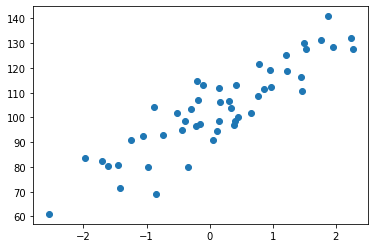

In [180]:
plt.scatter(X,y)

2.3 경사하강법을 위한 get_weight_updates, gradient_descent_stpes, get_cost 함수를 완성해주세요. 빈 괄호를 채워주세요.

In [181]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N = len(y)
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  y_pred = np.dot(X,w1.T) + w0
  diff = y - y_pred

  w0_factors = np.ones((N,1))

  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
  return w1_update, w0_update

In [182]:
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [183]:
def get_cost(y,y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred)/N)
  return cost

2.4 gradient_descent_steps 함수를 이용해 w1, w0을 계산하여 출력하세요. 또 get_cost 함수를 이용해 실제값과 예측값의 RSS 차이를 출력하세요.

In [184]:
# 예측값과 실제값의 RSS 차이를 계산하는 함수 생성
w1, w0 = gradient_descent_steps(X,y,iters = 1000)
print('w1: {0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X + w0
print('경사 하강 total cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1: 13.920 w0:101.714
경사 하강 total cost: 64.1102


2.5 X,y의 산점도와 함께 앞에서 구한 y_pred 기반 회귀선을 그려주세요.

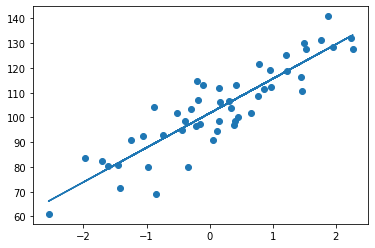

In [185]:
plt.scatter(X,y)
plt.plot(X,y_pred)

### 3. 규제 선형 모델

#### 
alpha 값의 변화에 따른 릿지 회귀를 수행해보겠습니다.
릿지의 alpha 값을 0, 0.1, 1, 10, 100으로 변화시키면서 cv=5인 교차검증을 수행하고, 그에 따른 RMSE의 평균값을 출력해주세요.

alphas = [0, 0.1, 1, 10, 100]

In [186]:
from sklearn.linear_model import Ridge

In [187]:
from sklearn.model_selection import cross_val_score
alphas = [0, 0.1, 1, 10, 100]
for i in alphas:
    ridge = Ridge(alpha = i)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}, 5 folds의 평균 RMSE : {1:.3f} '.format(i,avg_rmse))

alpha 0, 5 folds의 평균 RMSE : 8.369 
alpha 0.1, 5 folds의 평균 RMSE : 8.366 
alpha 1, 5 folds의 평균 RMSE : 8.342 
alpha 10, 5 folds의 평균 RMSE : 8.462 
alpha 100, 5 folds의 평균 RMSE : 12.692 


#### 
릿지 회귀에서 alpha 값의 변화에 따른 피처의 회귀 계수 값을 DataFrame으로 출력해주세요.

In [190]:
X = insurance.drop('charges', axis = 1)
y = insurance.iloc[:,3]

coeff_df = pd.DataFrame()

for i in alphas:
    ridge = Ridge(alpha = i)
    ridge.fit(X, y)
    coeff = pd.Series(data = ridge.coef_, index = X.columns)
    colname = 'alpha:' + str(i)
    coeff_df[colname] = coeff

ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
sex_female,2.134726e+18,65.478686,63.878162,48.442781,-61.985752
sex_male,2.134726e+18,-65.478686,-63.878162,-48.442781,61.985752
bmi,3.411050e+02,339.181665,339.076048,338.065597,331.228569
age,2.593615e+02,256.853283,256.825701,256.554472,254.241965
children,1.578760e+02,475.494224,475.436877,474.820180,465.582620
smoker_yes,-3.216108e+17,11921.493887,11896.592025,11653.239226,9677.670082
smoker_no,-3.216108e+17,-11921.493887,-11896.592025,-11653.239226,-9677.670082
region_northeast,-4.471454e+17,586.834455,585.266199,570.041509,452.770454
region_northwest,-4.471454e+17,233.826079,231.862004,213.101025,88.138956
region_southeast,-4.471454e+17,-447.601278,-443.914518,-408.672957,-172.581812


#### 
alpha 값의 변화에 따른 라쏘 회귀를 수행해보겠습니다.
릿지의 alpha 값을 0.07, 0.1, 0.5, 1, 3으로 변화시키면서 cv=5인 교차검증을 수행하고, 그에 따른 RMSE의 평균값을 출력해주세요.

alphas = [0.07, 0.1, 0.5, 1, 3]

In [191]:
from sklearn.linear_model import Lasso

In [192]:
from sklearn.model_selection import cross_val_score
alphas = [0.07, 0.1, 0.5, 1, 3]
for i in alphas:
    lasso = Lasso(alpha = i)
    neg_mse_scores = cross_val_score(lasso, X, y, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}, 5 folds의 평균 RMSE : {1:.3f} '.format(i,avg_rmse))

alpha 0.07, 5 folds의 평균 RMSE : 6072.399 
alpha 0.1, 5 folds의 평균 RMSE : 6072.395 
alpha 0.5, 5 folds의 평균 RMSE : 6072.366 
alpha 1, 5 folds의 평균 RMSE : 6072.320 
alpha 3, 5 folds의 평균 RMSE : 6072.148 


#### 
라쏘 회귀에서 alpha 값의 변화에 따른 피처의 회귀 계수 값을 DataFrame으로 출력해주세요.

In [193]:
X = insurance.drop('charges', axis = 1)
y = insurance.iloc[:,3]

coeff_df = pd.DataFrame()

for i in alphas:
    lasso = Lasso(alpha = i)
    lasso.fit(X, y)
    coeff = pd.Series(data = lasso.coef_, index = X.columns)
    colname = 'alpha:' + str(i)
    coeff_df[colname] = coeff

lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
region_northeast,8.906420e+02,8.904238e+02,8.875057e+02,8.838694e+02,8.693243e+02
region_northwest,5.376730e+02,5.374526e+02,5.345145e+02,5.308420e+02,5.161519e+02
children,4.754529e+02,4.754324e+02,4.751596e+02,4.748190e+02,4.734565e+02
bmi,3.391784e+02,3.391719e+02,3.390871e+02,3.389794e+02,3.385488e+02
age,2.568568e+02,2.568570e+02,2.568617e+02,2.568650e+02,2.568784e+02
sex_female,1.310014e+02,1.308673e+02,1.290778e+02,1.268425e+02,1.179015e+02
smoker_yes,9.532954e-12,2.936566e-11,1.556109e-11,7.880723e-12,2.527842e-11
sex_male,-2.714592e-13,-5.217591e-14,-0.000000e+00,-9.789356e-14,-0.000000e+00
region_southwest,-6.881903e+01,-6.878434e+01,-6.832408e+01,-6.774601e+01,-6.543370e+01
region_southeast,-1.437546e+02,-1.437047e+02,-1.430365e+02,-1.422052e+02,-1.388797e+02


#### 
alpha 값의 변화에 따른 엘라스틱넷 회귀를 수행해보겠습니다. l1_ratio는 0.5로 고정하겠습니다.
엘라스틱넷의 alpha 값을 0.07, 0.1, 0.5, 1, 3으로 변화시키면서 cv=5인 교차검증을 수행하고, 그에 따른 RMSE의 평균값을 출력해주세요.

alphas = [0.07, 0.1, 0.5, 1, 3]

In [194]:
from sklearn.linear_model import ElasticNet

In [195]:
from sklearn.model_selection import cross_val_score
alphas = [0.07, 0.1, 0.5, 1, 3]
for i in alphas:
    elastic = ElasticNet(alpha = i)
    neg_mse_scores = cross_val_score(lasso, X, y, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}, 5 folds의 평균 RMSE : {1:.3f} '.format(i,avg_rmse))

alpha 0.07, 5 folds의 평균 RMSE : 6072.148 
alpha 0.1, 5 folds의 평균 RMSE : 6072.148 
alpha 0.5, 5 folds의 평균 RMSE : 6072.148 
alpha 1, 5 folds의 평균 RMSE : 6072.148 
alpha 3, 5 folds의 평균 RMSE : 6072.148 


#### 
엘라스틱 회귀에서 alpha 값의 변화에 따른 피처의 회귀 계수 값을 DataFrame으로 출력해주세요.

In [196]:
X = insurance.drop('charges', axis = 1)
y = insurance.iloc[:,3]

coeff_df = pd.DataFrame()

for i in alphas:
    elastic = ElasticNet(alpha = i)
    elastic.fit(X, y)
    coeff = pd.Series(data = elastic.coef_, index = X.columns)
    colname = 'alpha:' + str(i)
    coeff_df[colname] = coeff

elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
smoker_yes,10753.802509,10320.281145,6719.914886,4683.535228,2119.079972
region_northeast,515.196732,489.587745,294.719264,196.326918,82.358766
children,471.583750,469.455230,431.963218,384.815364,261.220919
bmi,334.656475,333.191126,324.813852,322.072216,315.997687
age,255.525975,255.015668,250.419836,247.519072,243.229559
region_northwest,150.249808,123.513992,-19.145061,-47.240585,-38.906154
sex_male,5.180770,29.037902,167.890560,188.468297,133.966138
sex_female,-5.160047,-29.021618,-167.940443,-188.475367,-133.966258
region_southeast,-290.330866,-239.811660,33.587432,89.245469,75.580248
region_southwest,-375.071052,-373.249730,-309.148499,-238.331498,-119.032874


### 4.Logistic Regression

Dataset <fish.csv>를 다운 받아주세요!
#### fish의 Weight, Length, Diagnal, Height, Width 정보를 바탕으로 fish의 Species를 분류하는 예제

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

#### 'fish.csv'로 fish_df를 생성하세요

In [201]:
fish_df = pd.read_csv('/Users/dohakim/Python_Workplace/2022-2-Euron-DS-Week_5/fish.csv')
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


#### fish 데이터 세트의 target 배열은 Species입니다.
#### fish_df를 y_target, X_data로 분리해주세요

In [209]:
X_data = fish_df.iloc[:,1:]
y_target = fish_df.iloc[:,0]

#### X_data와 y_target을 X_train, X_test, y_train, y_test으로 나누세요. (test_size=0.3, random_state=42)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_target,test_size = 0.3, random_state = 42)

#### StandardScaler를 이용해 데이터 변환을 해주세요

In [211]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 로지스틱 회귀를 이용해서 학습 및 예측을 수행하고 정확도와 ROC-AUC값을 구하세요 (solver = liblinear, C=20, max_iter=1000)

In [212]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression(solver = 'liblinear',C = 20, max_iter = 1000)
lr_clf.fit(X_scaled, y_train)
lr_preds = lr_clf.predict(X_test_scaled)
lr_preds_proba = lr_clf.predict_proba(X_test_scaled)
print('accuracy: {:0.3f}'.format(accuracy_score(y_test,lr_preds))) 
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test,lr_preds_proba,multi_class = 'ovr'))) # 다중 분류 문제

accuracy: 0.938
roc_auc: 0.989
